In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
di = np.random.uniform(0,5, 20)

In [3]:
def signal_model(x, a, b):
    return a*np.exp(b*x)

In [4]:
def c0_k(mu, x, k):
    return (((((k*x)-mu)**k)*np.exp(-k*x))/(np.math.factorial(k)))*(1+(k/(mu-(k*x))))

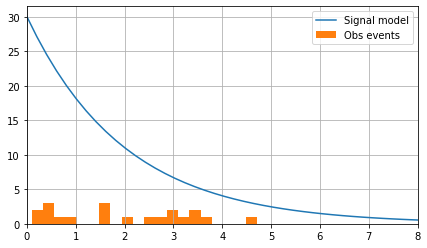

In [17]:
c1, c2 = 30, -0.5

plt.figure(figsize=(7,4))
x = np.linspace(0, 20, 100)
plt.plot(x, signal_model(x,c1, c2) , label = 'Signal model')
histvalues, xbins, _ = plt.hist(di, bins = 20, label = 'Obs events')
binscenter=(xbins[:-1]+xbins[1:])*0.5
plt.xlim(0,8); plt.legend(); plt.grid()
plt.show()

## Maximum gap method

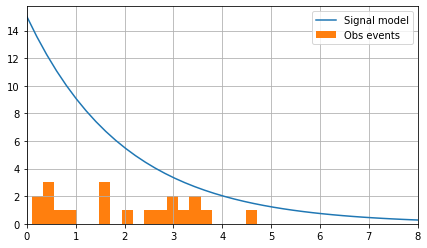

maximum area  3.73401783227631 is between 1.0171953428640372 and 1.4787156637923569


In [6]:
c1, c2 = 15, -0.5
plt.figure(figsize=(7,4))
x = np.linspace(0, 20, 100)
plt.plot(x, signal_model(x,c1, c2) , label = 'Signal model')
histvalue, xbins, _ = plt.hist(di, bins = 20, label = 'Obs events')
binscenter=(xbins[:-1]+xbins[1:])*0.5
plt.xlim(0,8); plt.legend(); plt.grid()
plt.show()

i, maxgaps = 0, []
for b in range(20):
    if i < 20 and histvalue[i] ==0:
        for n in range(5):
            if histvalue[i+n] !=0: 
                gaparea = np.trapz([signal_model(xbins[i], c1, c2 ), signal_model(xbins[i+n], c1, c2 )], [xbins[i], xbins[i+n]])
                maxgaps.append((i, i+n , gaparea))
                i+=n; 
                break
    else:
        i+=1
maxgaps.append((xbins[-1], 8, np.trapz([signal_model(xbins[-1], c1, c2 ), signal_model(8, c1, c2 )], [xbins[-1], 8])))
maxarray = np.asarray(maxgaps)
maxvalues = maxarray[:][np.argmax(maxarray[:,2])]
print('maximum area ', maxvalues[2], 'is between', xbins[int(maxvalues[0])], 'and', xbins[int(maxvalues[1])])

In [7]:
mu = 0
for b in range(20):
    mu+=np.trapz([signal_model(xbins[b], c1, c2 ), signal_model(xbins[b+1],c1, c2 )], [xbins[b], xbins[b+1]])
print('mu is', mu)
print('m is ', mu/maxvalues[2])
print('x is', maxvalues[2])
c0 = 0
for k in range(0, int(mu/maxvalues[2])+1):
    c0 +=c0_k(mu=mu, x = maxvalues[2], k=k)
print('C0', c0)

mu is 25.801274114079245
m is  6.909788670813718
x is 3.73401783227631
C0 0.5469322462042351


### Finding optimum signal model / sigma and $C_0$ using maximum gap method

For constant c1 22.36842105263158  c2  -0.5
C0 is 0.8763086721010228
expected events / area under blue curve:  38.4755842052059


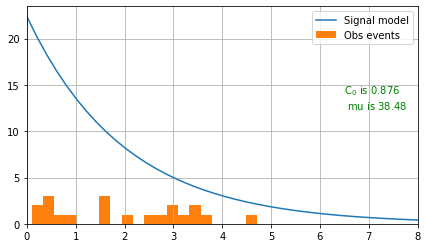

-------------------------------------
For constant c1 23.894736842105264  c2  -0.5
C0 is 0.9086875234898947
expected events / area under blue curve:  41.100977009796416


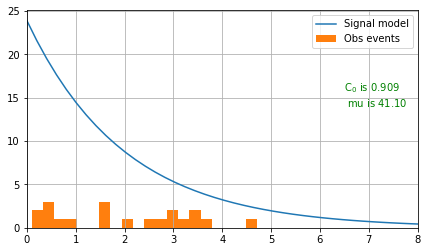

-------------------------------------
For constant c1 25.42105263157895  c2  -0.5
C0 is 0.9330696851045626
expected events / area under blue curve:  43.72636981438695


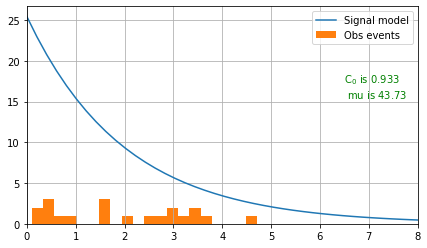

-------------------------------------
For constant c1 28.47368421052632  c2  -0.7368421052631584
C0 is 0.8570526057779194
expected events / area under blue curve:  34.93434713128784


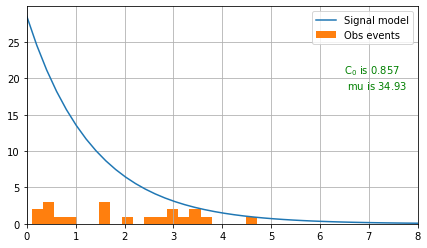

-------------------------------------
For constant c1 30.0  c2  -0.7368421052631584
C0 is 0.8856856730355522
expected events / area under blue curve:  36.806983114295875


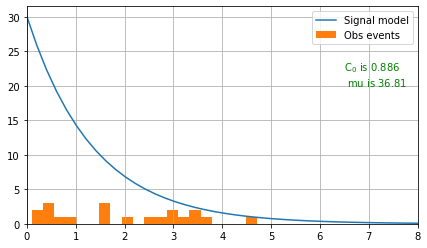

-------------------------------------


In [8]:
c1_all, c2_all, mu_all, c0_all = [], [], [], []
for c1 in np.linspace(1,30,20):
    for c2 in np.linspace(-5,-0.5,20):
        i, maxgaps = 0, []
        for b in range(20):
            if i < 20 and histvalue[i] ==0:
                for n in range(5):
                    if histvalue[i+n] !=0: 
                        gaparea = np.trapz([signal_model(xbins[i], c1, c2 ), signal_model(xbins[i+n], c1, c2 )], [xbins[i], xbins[i+n]])
                        maxgaps.append((i, i+n , gaparea))
                        i+=n; 
                        break
            else:
                i+=1
        maxgaps.append((xbins[-1], 8, np.trapz([signal_model(xbins[-1], c1, c2 ), signal_model(8, c1, c2 )], [xbins[-1], 8])))
        maxarray = np.asarray(maxgaps)
        maxvalues = maxarray[:][np.argmax(maxarray[:,2])]

        mu = 0
        for b in range(20):
            mu+=np.trapz([signal_model(xbins[b], c1, c2 ), signal_model(xbins[b+1],c1, c2 )], [xbins[b], xbins[b+1]])

        c0 = 0
        for k in range(0, int(mu/maxvalues[2])+1):
            c0 +=c0_k(mu=mu, x = maxvalues[2], k=k)
        c1_all.append(c1); c2_all.append(c2); mu_all.append(mu); c0_all.append(c0)
        if c0 > 0.85 and c0 < 0.95:
            print('For constant c1', c1, ' c2 ', c2)
            print('C0 is', c0)
            print('expected events / area under blue curve: ', mu)
            plt.figure(figsize=(7,4))
            x = np.linspace(0, 20, 100)
            plt.plot(x, signal_model(x,c1, c2) , label = 'Signal model')
            plt.hist(di, bins = 20, label = 'Obs events')
            plt.text(6.5,c1-10,'$\mathregular{C_0}$ is %.3f \n $\mathregular{mu}$ is %.2f'%(c0, mu), color ='green')
            plt.xlim(0,8); plt.legend(); plt.grid()
            plt.show()
            print('-------------------------------------')

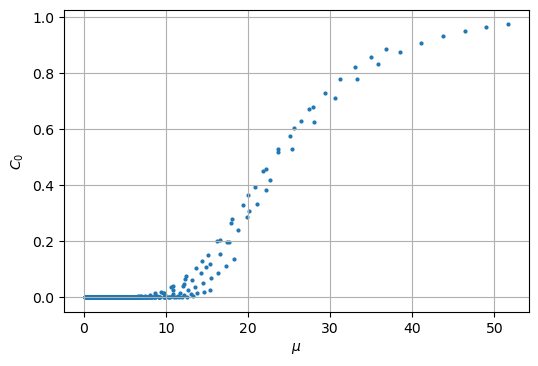

In [9]:
plt.figure(dpi=100)
plt.scatter(mu_all, c0_all, s=4)
plt.xlabel('$\mu$');plt.ylabel('$C_0$');plt.grid(); plt.show()

In [10]:
print('\tmu\t\t\tc1\t\t  c2')
for n in np.where(np.array(mu_all)>20)[0]:
    print(mu_all[n],'\t', c1_all[n],'\t', c2_all[n])

	mu			c1		  c2
20.09783457307226 	 11.68421052631579 	 -0.5
22.723227377662784 	 13.210526315789474 	 -0.5
25.348620182253306 	 14.73684210526316 	 -0.5
27.974012986843825 	 16.263157894736842 	 -0.5
21.825895250231593 	 17.789473684210527 	 -0.7368421052631584
30.59940579143435 	 17.789473684210527 	 -0.5
23.698531233239628 	 19.315789473684212 	 -0.7368421052631584
33.22479859602486 	 19.315789473684212 	 -0.5
25.571167216247666 	 20.842105263157897 	 -0.7368421052631584
35.850191400615394 	 20.842105263157897 	 -0.5
20.813349746238757 	 22.36842105263158 	 -0.9736842105263159
27.443803199255708 	 22.36842105263158 	 -0.7368421052631584
38.4755842052059 	 22.36842105263158 	 -0.5
22.23355478774681 	 23.894736842105264 	 -0.9736842105263159
29.31643918226374 	 23.894736842105264 	 -0.7368421052631584
41.100977009796416 	 23.894736842105264 	 -0.5
23.653759829254874 	 25.42105263157895 	 -0.9736842105263159
31.189075165271774 	 25.42105263157895 	 -0.7368421052631584
43.72636981438695 

## Optimum Interval method

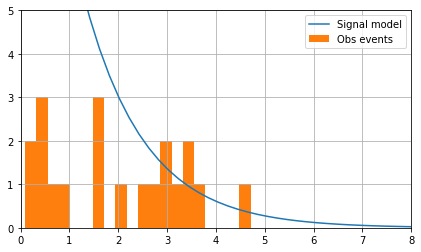

maximum area  6.445387433354341 is between 0.09415470100739842 and 0.3249148614715581


In [11]:
c1, c2 = 15, -0.8
plt.figure(figsize=(7,4))
plt.plot(x, signal_model(x,c1, c2) , label = 'Signal model')
plt.hist(di, bins = 20, label = 'Obs events')
# plt.scatter(binscenter,value, s=10, color ='black',label ='values')
plt.xlim(0,8); plt.ylim(0,5);plt.legend();plt.grid()
# for i in range(20):
#     plt.text(xbins[i]+0.05 , histvalue[i] + 0.2, str(i), fontsize=10)#, ha='center')
plt.show()

n = 4

maxgaps = []
for b in range(len(histvalue)):
    if histvalue[b] == n:
        startbin = b; endbin = b+1; startx = xbins[b]; endx = xbins[b+1]
#         print('startbin ', startbin,'endbin ', endbin, ', xvalue of start bin ', startx, ', xvalue of end bin ', endx)
        gaparea = np.trapz([signal_model(startx, c1, c2 ), signal_model(endx, c1, c2 )], [startx, endx])
#         print('x_i = ', gaparea)
        maxgaps.append((startx, endx , gaparea))
    for m in np.arange(1,5):
        if b+m < 20:
            if np.sum([histvalue[b+i] for i in range(m+1)]) < n:
                continue
            elif np.sum([histvalue[b+i] for i in range(m+1)]) == n:
                startbin = b; endbin = b+m+1; startx = xbins[b]; endx = xbins[b+m+1]
#                 print('startbin ', startbin,'endbin ', endbin, ', xvalue of start bin ', startx, ', xvalue of end bin ', endx)
                gaparea = np.trapz([signal_model(startx, c1, c2 ), signal_model(endx, c1, c2 )], [startx, endx])
#                 print('x_i = ', gaparea)
                maxgaps.append((startx, endx , gaparea))
                continue
            else:
                break
maxarray = np.asarray(maxgaps)
# print(maxarray)
maxvalues = maxarray[:][np.argmax(maxarray[:,2])]
print('maximum area ', maxvalues[2], 'is between', xbins[int(maxvalues[0])], 'and', xbins[int(maxvalues[1])])

In [31]:
mu = 0
for b in range(20):
    mu+=np.trapz([signal_model(xbins[b], c1, c2 ), signal_model(xbins[b+1],c1, c2 )], [xbins[b], xbins[b+1]])
print('mu is', mu)
print('m is ', mu/maxvalues[2])
print('x is', maxvalues[2])
c0 = 0
for k in range(0, int(mu/maxvalues[2])+1):
    c0 +=c0_k(mu=mu, x = maxvalues[2], k=k)
print('C0', c0)

mu is 17.948567131512043
m is  1.8233112953225283
x is 9.843940076254007
C0 0.999516837404515


### Finding optimum signal model / sigma and $C_n$ using optimum interval method

In [100]:
def find_bin_width(n, b, histvalues):
    """Returns the start and stop bin for an interval containing exactly n events
    Args:
        n (int): Number of events to search for
        b (int): Starting bin
        histvalue (list): List of bins for a histogram
    
    Returns:
        List: [startbin, endbin] 
    """
    # TODO: Ask Anthony if <= or == n events
    
    num_events = histvalues[b]
    startbin = b
    max_bins = len(histvalues)
    for b_i in range(b+1, max_bins):
        num_events += histvalues[b_i]        
        # Stop when we find n events
        if num_events == n:
            endbin = b_i
            # Check for 0 events in next bins
            i = 0; j = 20
            while True:
                if b_i+i < 20:
                    nextbin = b_i+i
                    endbin = nextbin if histvalues[nextbin] == 0 else b_i
                    i += 1
                elif b-j >0:
                    prevbin = b-j
                    startbin = prevbin if histvalues[prevbin] == 0 else b
                    j -= 1
                else:
                    break
            return [startbin, endbin]
    return None

b 19
3.094036787041475 4.4785977498264335
For constant c1 15.0  c2  -1.2777777777777777
C0 is 0.918555469069556
expected events / area under blue curve:  10.45496257329278


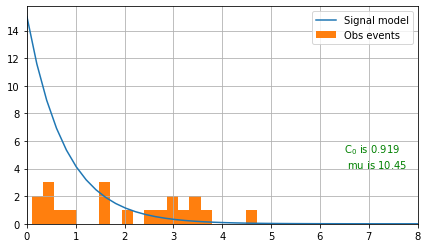

-------------------------------------
b 19
3.094036787041475 4.4785977498264335
For constant c1 20.0  c2  -1.6666666666666665
C0 is 0.9186158792908435
expected events / area under blue curve:  10.37860798993063


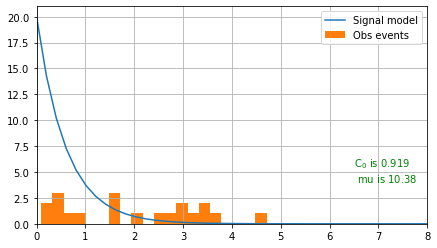

-------------------------------------
b 19
3.094036787041475 4.4785977498264335
For constant c1 25.0  c2  -2.0555555555555554
C0 is 0.8995976413246094
expected events / area under blue curve:  10.208505378423128


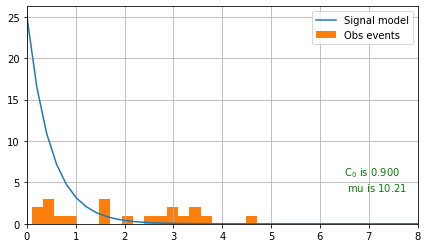

-------------------------------------
b 19
3.094036787041475 4.4785977498264335
For constant c1 30.0  c2  -3.611111111111111
C0 is 0.8915618176824461
expected events / area under blue curve:  6.251423907088108


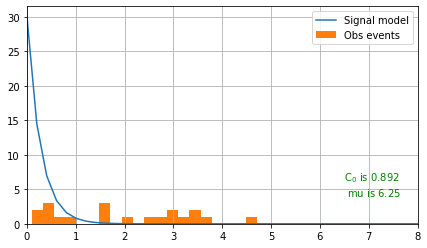

-------------------------------------
b 19
3.094036787041475 4.4785977498264335
For constant c1 30.0  c2  -3.2222222222222223
C0 is 0.8982331908722668
expected events / area under blue curve:  7.187773058596201


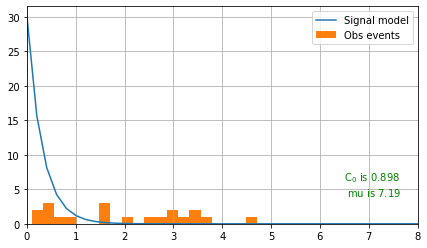

-------------------------------------
b 19
3.094036787041475 4.4785977498264335
For constant c1 30.0  c2  -2.833333333333333
C0 is 0.904697409739881
expected events / area under blue curve:  8.395792760542115


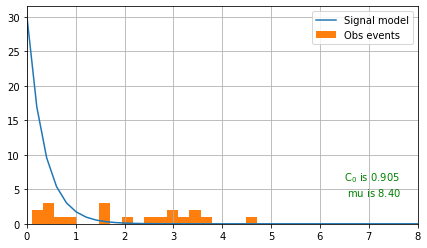

-------------------------------------
b 19
3.094036787041475 4.4785977498264335
For constant c1 30.0  c2  -2.4444444444444446
C0 is 0.9108775273121754
expected events / area under blue curve:  10.006602427343195


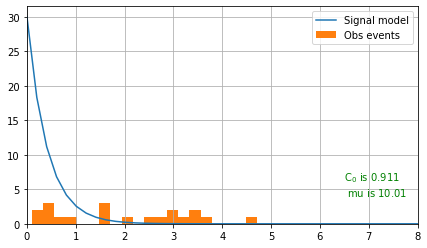

-------------------------------------


In [108]:
n = 5
c1_all, c2_all, mu_all, c0_all = [], [], [], []
for c1 in np.linspace(5,50,10):
    for c2 in np.linspace(-4,-0.5,10):
        maxgaps = []
        for b in range(20):
            if b < len(histvalue):
#                 print('#events = '+ str(n)+' at bin#: ', b, ', xvalue[bin]: ',xbins[b], ', histvalue[i]: ',histvalue[b])
                if find_bin_width(n, b,  histvalues)!=None:
                    startbin = find_bin_width(n, b,  histvalues)[0]
                    endbin = find_bin_width(n, b,  histvalues)[1]
                    startx = xbins[startbin]
                    endx = xbins[endbin]                
                    gaparea = np.trapz([signal_model(startx, c1, c2 ), signal_model(endx, c1, c2 )], [startx, endx])
                    maxgaps.append((startx, endx , gaparea))
                    maxarray = np.asarray(maxgaps)
                    maxvalues = maxarray[:][np.argmax(maxarray[:,2])]
                    mu = 0
                    for b in range(20):
                        mu+=np.trapz([signal_model(xbins[b], c1, c2 ), signal_model(xbins[b+1],c1, c2 )], [xbins[b], xbins[b+1]])

                    c0 = 0
                    for k in range(0, int(mu/maxvalues[2])+1):
                        c0 +=c0_k(mu=mu, x = maxvalues[2], k=k)
                    c1_all.append(c1); c2_all.append(c2); mu_all.append(mu); c0_all.append(c0)
        if c0 > 0.89 and c0 < 0.92:
            print('b', b)         
            print(startx, endx)
            print('For constant c1', c1, ' c2 ', c2)
            print('C0 is', c0)
            print('expected events / area under blue curve: ', mu)
            plt.figure(figsize=(7,4))
            x = np.linspace(0, 20, 100)
            plt.plot(x, signal_model(x,c1, c2) , label = 'Signal model')
            plt.hist(di, bins = 20, label = 'Obs events')
            plt.text(6.5,4,'$\mathregular{C_0}$ is %.3f \n $\mathregular{mu}$ is %.2f'%(c0, mu), color ='green')
            plt.xlim(0,8); plt.legend(); plt.grid()
            plt.show()
            print('-------------------------------------')

In [110]:
# plt.figure(dpi=100)
# plt.scatter(mu_all, c0_all, s=4)
# plt.xlabel('$\mu$');plt.ylabel('$C_0$');plt.grid(); plt.show()

In [111]:
# print('\tmu\t\t\tc1\t\t  c2')
# for n in np.where(np.array(mu_all)>45)[0]:
#     print(mu_all[n],'\t', c1_all[n],'\t', c2_all[n])

b 19
3.3247969475056345 4.4785977498264335
For constant c1 21.071428571428573  c2  -1.0
C0 is 0.8991074750252338
expected events / area under blue curve:  19.072311240691317


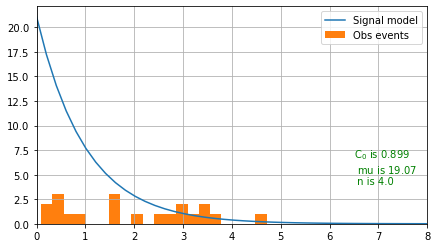

-------------------------------------
b 19
3.3247969475056345 4.4785977498264335
For constant c1 27.5  c2  -1.25
C0 is 0.9034694847713199
expected events / area under blue curve:  19.63122663173261


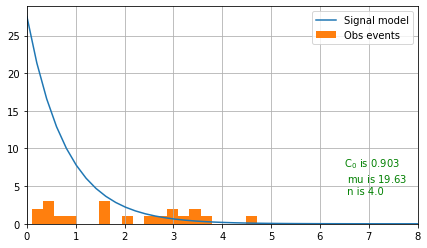

-------------------------------------
b 19
3.5555571079697943 4.4785977498264335
For constant c1 50.0  c2  -1.0
C0 is 0.8976229321838872
expected events / area under blue curve:  45.25633175757257


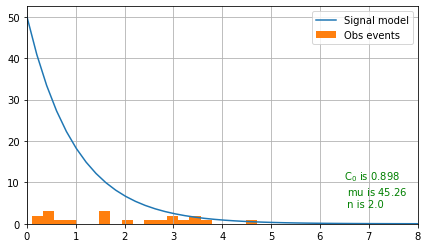

-------------------------------------


In [120]:

for c1 in np.linspace(5,50,15):
    for c2 in np.linspace(-4,-0.5,15):
        for n in range(1,5):
            maxgaps = []
            for b in range(20):
                if b < len(histvalue):
        #                 print('#events = '+ str(n)+' at bin#: ', b, ', xvalue[bin]: ',xbins[b], ', histvalue[i]: ',histvalue[b])
                    if find_bin_width(n, b,  histvalues)!=None:
                        startbin = find_bin_width(n, b,  histvalues)[0]
                        endbin = find_bin_width(n, b,  histvalues)[1]
                        startx = xbins[startbin]
                        endx = xbins[endbin]                
                        gaparea = np.trapz([signal_model(startx, c1, c2 ), signal_model(endx, c1, c2 )], [startx, endx])
                        maxgaps.append((startx, endx , gaparea))
                        maxarray = np.asarray(maxgaps)
                        maxvalues = maxarray[:][np.argmax(maxarray[:,2])]
                        mu = 0
                        for b in range(20):
                            mu+=np.trapz([signal_model(xbins[b], c1, c2 ), signal_model(xbins[b+1],c1, c2 )], [xbins[b], xbins[b+1]])

                        c0 = 0
                        for k in range(0, int(mu/maxvalues[2])+1):
                            c0 +=c0_k(mu=mu, x = maxvalues[2], k=k)
                        c1_all.append(c1); c2_all.append(c2); mu_all.append(mu); c0_all.append(c0)
            if c0 > 0.895 and c0 < 0.905:
                print('b', b)         
                print(startx, endx)
                print('For constant c1', c1, ' c2 ', c2)
                print('C0 is', c0)
                print('expected events / area under blue curve: ', mu)
                plt.figure(figsize=(7,4))
                x = np.linspace(0, 20, 100)
                plt.plot(x, signal_model(x,c1, c2) , label = 'Signal model')
                plt.hist(di, bins = 20, label = 'Obs events')
                plt.text(6.5,4,'$\mathregular{C_0}$ is %.3f \n $\mathregular{mu}$ is %.2f\n n is %.1f'%(c0, mu, n), color ='green')
                plt.xlim(0,8); plt.legend(); plt.grid()
                plt.show()
                print('-------------------------------------')